# ETS (Error-Trend-Seasonal) model -> which is a part of Exponential Smoothing State Space Model
## Breakdown of the components:
* E (Error): Specifies how the error term enters the model, either additively ("add") or multiplicatively ("mul").
* T (Trend): Defines the trend component, which can also be additive, multiplicative, or none.
* S (Seasonal): Determines the seasonality, which can be additive, multiplicative, or none.

### A good alternative would be the ARIMA model. However, the ARIMA model requires the data to be stationary while the ETS model does not have this condition -> the ETS can be more flexible in the real world compared to ARIMA


### Database
For this project we will be using the seaborn library. They provide free data which we can use to test out our models.
For more info: https://seaborn.pydata.org/generated/seaborn.load_dataset.html

In [19]:
# print list of all avaible databases names
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [20]:
import seaborn as sns

# Load the tips dataset
df_tips = sns.load_dataset('tips')
print(df_tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [21]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### We will focus on the total bill and implement the ETS model to predict future bills

<Axes: >

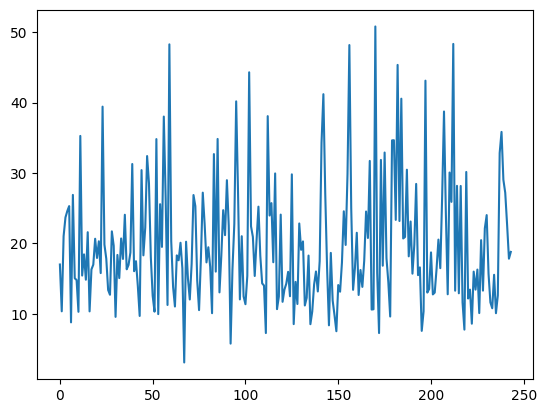

In [23]:
df_tips['total_bill'].plot()

### Model
Now we need to prepare our database format. The ETS model requires a data index. In this project we assume that each total bill represent a week so we can implement the index for Series

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [ ]:
# Construct time series data total bill format
np.random.seed(42)
date_rng = pd.date_range(start='2018-05-03', end='2023-01-01', freq='W')
data = pd.Series(df_tips['total_bill'].values, index=date_rng)

In [ ]:
# Fit ETS model
ets_model = ETSModel(data, trend='add', seasonal='add', seasonal_periods=7)
fit_ets = ets_model.fit()

Now for the fun part we can predict the values for the upcoming 26 weeks or the next 26 total bills



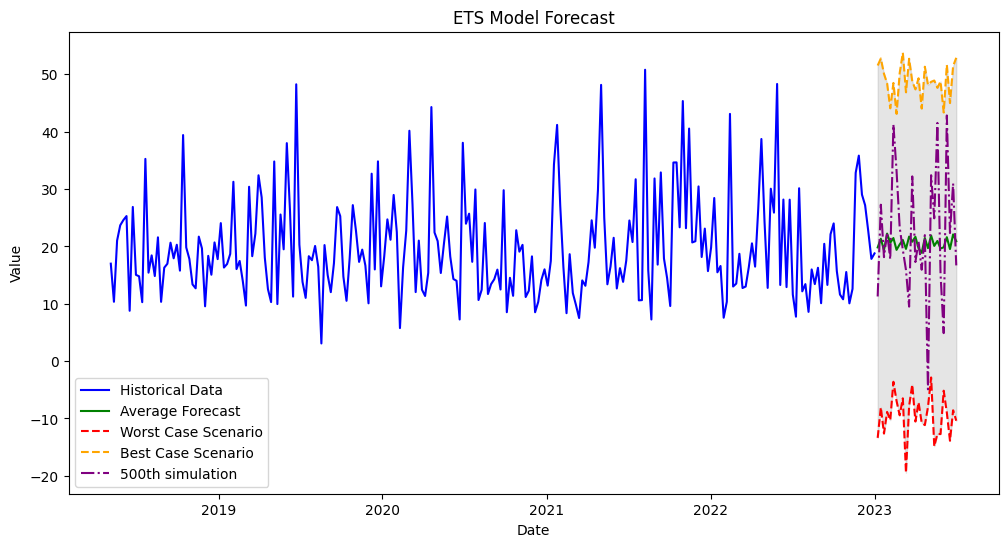

In [74]:
# Forecast future values
forecast_horizon = 26
point_forecast = fit_ets.forecast(steps=forecast_horizon)

# Simulate 1000 paths with added noise
num_simulations = 1000
simulations = np.zeros((forecast_horizon, num_simulations))
residual_std = fit_ets.resid.std()  # Standard deviation of residuals for noise

for i in range(num_simulations):
    # Generate each simulation by adding normally-distributed noise
    simulated_path = point_forecast + np.random.normal(0, residual_std, forecast_horizon)
    simulations[:, i] = simulated_path

# Calculate average, worst, and best scenarios from simulations
average_forecast = simulations.mean(axis=1)
worst_forecast = simulations.min(axis=1)  # Worst case across all simulations
best_forecast = simulations.max(axis=1)   # Best case across all simulations
median_forecast = simulations[:, 499]  # Median forecast

# Creating future dates for plotting
future_dates = [data.index[-1] + pd.DateOffset(weeks=x) for x in range(1, forecast_horizon + 1)]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical Data', color='blue')
plt.plot(future_dates, average_forecast, label='Average Forecast', color='green')
plt.plot(future_dates, worst_forecast, label='Worst Case Scenario', linestyle='--', color='red')
plt.plot(future_dates, best_forecast, label='Best Case Scenario', linestyle='--', color='orange')
plt.plot(future_dates, median_forecast, label='500th simulation', color='purple', linestyle='-.')
plt.fill_between(future_dates, worst_forecast, best_forecast, color='gray', alpha=0.2)
plt.title('ETS Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Now we can also forecast for the next 102 bills by changing the forecast_horizon variable

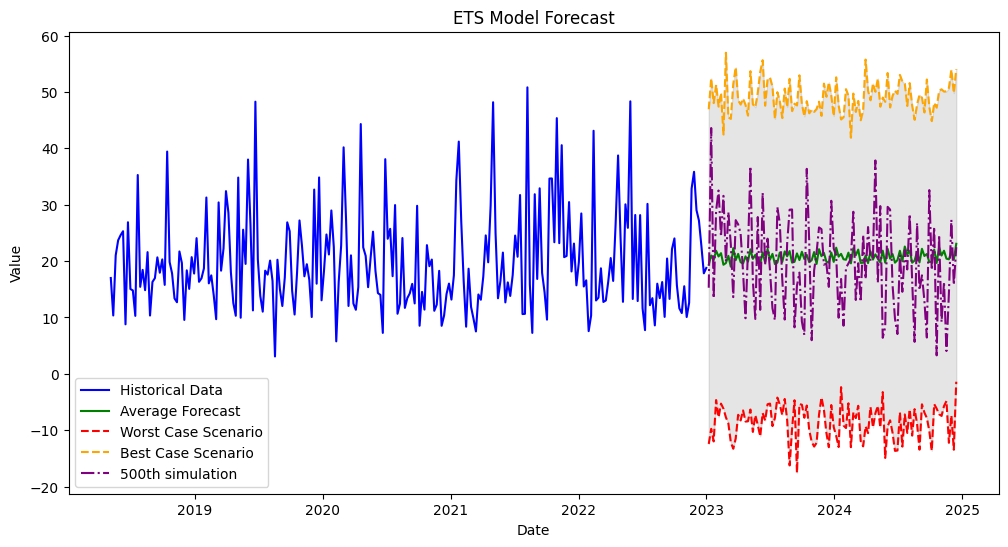

In [75]:
# Forecast future values
forecast_horizon = 102
point_forecast = fit_ets.forecast(steps=forecast_horizon)

# Simulate 1000 paths with added noise
num_simulations = 1000
simulations = np.zeros((forecast_horizon, num_simulations))
residual_std = fit_ets.resid.std()  # Standard deviation of residuals for noise

for i in range(num_simulations):
    # Generate each simulation by adding normally-distributed noise
    simulated_path = point_forecast + np.random.normal(0, residual_std, forecast_horizon)
    simulations[:, i] = simulated_path

# Calculate average, worst, and best scenarios from simulations
average_forecast = simulations.mean(axis=1)
worst_forecast = simulations.min(axis=1)  # Worst case across all simulations
best_forecast = simulations.max(axis=1)   # Best case across all simulations
median_forecast = simulations[:, 499]  # Median forecast

# Creating future dates for plotting
future_dates = [data.index[-1] + pd.DateOffset(weeks=x) for x in range(1, forecast_horizon + 1)]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical Data', color='blue')
plt.plot(future_dates, average_forecast, label='Average Forecast', color='green')
plt.plot(future_dates, worst_forecast, label='Worst Case Scenario', linestyle='--', color='red')
plt.plot(future_dates, best_forecast, label='Best Case Scenario', linestyle='--', color='orange')
plt.plot(future_dates, median_forecast, label='500th simulation', color='purple', linestyle='-.')
plt.fill_between(future_dates, worst_forecast, best_forecast, color='gray', alpha=0.2)
plt.title('ETS Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# Final thoughts:
This was a quick tutorial how to implement it but ofcourse implementing this model has it's pros and cons:

* The ETS model is flexible for non-stationary data and is feasible to generate quick forecasts compared to ARIMA
* The model is sensible for outliers or spikes in the data, as can be observed in the plots above
* In my own personal worklife this model has delivered acceptable forecasts


